# Plots

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# INDICATOR = ['quintilAlfabetizacao','quintilRenda']
# INDICATOR_PRED = ['quintilAlfabetizacaoPred','quintilRendaPred']
# INDICATOR_TITLE= ['Literacy', 'Income']
# FOLDER = ['literacy','income']
INDICATOR = ['quintilRenda']
INDICATOR_PRED = ['quintilRendaPred']
INDICATOR_TITLE= ['Income']
FOLDER = ['income']

## Figure 4: Street view images

In [3]:
from PIL import Image
from urllib.parse import urlencode
import random
import requests
from tqdm import tqdm 

import numpy as np
np.random.seed(286571) #seed random generator for reproduciblity

In [4]:
def get_image(pano_id, direction):
    y_ = []
    for y in range(2):
        params = {
            "cb_client": "maps_sv.tactile",
            "authuser": 0,
            "hl": "en",
            "gl": "br",
            "x": direction // 90,
            "y": y,
            "zoom": 2,
            "nbt": None,
            "fover": 0,
            "output": "tile",
            "panoid": pano_id,
        }
        url = f"https://geo{np.random.randint(0, 3)}.ggpht.com/cbk?{urlencode(params)}"
        img = np.asarray(Image.open(requests.get(url, stream=True).raw))
        y_.append(img[256:, :, :] if y == 0 else img[:256, :, :])
    return np.concatenate(y_)

def plot_image(score, w,h):
    _, axs = plt.subplots(w, h, figsize=(5,5))
    plt.suptitle(f'Samples for {INDICATOR_TITLE[s]} with score = {score}')      

    sample = ds[ds[INDICATOR[s]] == score].sample(w*h)
    for i in tqdm(range(0,w * h), leave=False):            
        row = sample.iloc[i] 
        print('Setor:', row['setor'], ' Lat:', row['latitude'], ' Long:', row['longitude'])
        axs[i%w][i//h].imshow(get_image(row['pano_id'], row['direction']))

  0%|          | 0/4 [00:00<?, ?it/s]

Setor: 350925405000026.0  Lat: -24.777923183728447  Long: -48.17094875045432


 25%|██▌       | 1/4 [00:00<00:01,  1.68it/s]

Setor: 412220605000022.0  Lat: -25.17660931941594  Long: -49.31708580617176


 50%|█████     | 2/4 [00:00<00:00,  2.03it/s]

Setor: 351480915000005.0  Lat: -24.600856618464107  Long: -48.40697937333394


 75%|███████▌  | 3/4 [00:01<00:00,  1.48it/s]

Setor: 412220605000022.0  Lat: -25.17497582844084  Long: -49.318241492456075


  0%|          | 0/4 [00:00<?, ?it/s]        

Setor: 350925405000037.0  Lat: -24.79463860000001  Long: -48.213734


 25%|██▌       | 1/4 [00:00<00:00,  4.40it/s]

Setor: 355180105000004.0  Lat: -24.38987043189629  Long: -47.92935812273997


 50%|█████     | 2/4 [00:00<00:00,  4.16it/s]

Setor: 410310705000009.0  Lat: -25.198216467998808  Long: -49.02417277659943


 75%|███████▌  | 3/4 [00:00<00:00,  4.12it/s]

Setor: 352042605000025.0  Lat: -24.72602982375075  Long: -47.54725297565837


  0%|          | 0/4 [00:00<?, ?it/s]        

Setor: 411125805000001.0  Lat: -25.217552655692767  Long: -49.34638316581614


 25%|██▌       | 1/4 [00:01<00:04,  1.33s/it]

Setor: 352042605000023.0  Lat: -24.74951648179346  Long: -47.55574109424232


 50%|█████     | 2/4 [00:03<00:03,  1.54s/it]

Setor: 354260205000002.0  Lat: -24.49408460391487  Long: -47.84519572160847


 75%|███████▌  | 3/4 [00:04<00:01,  1.40s/it]

Setor: 353720605000003.0  Lat: -24.27888230910638  Long: -47.23652663575058


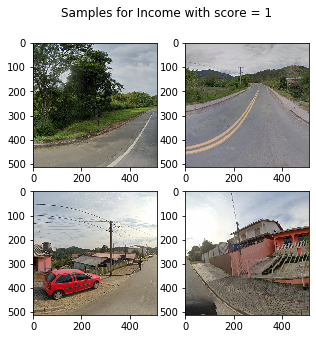

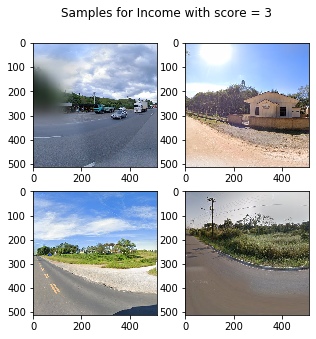

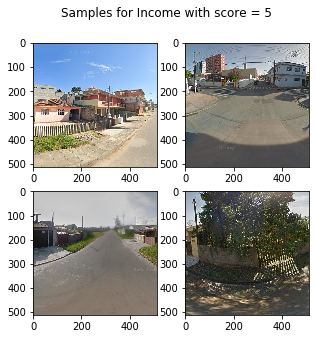

In [5]:
for s in range(0,len(INDICATOR)):
    df = pd.read_csv('geo_fold.csv') 
    idh = pd.read_csv('IDHMs/IDHM_ValeRibeira.csv')
    ds = pd.merge(df, idh, left_on='setor', right_on='Cod_setor', how='inner')
    
    plot_image(score=1, w=2,h=2)
    plot_image(score=3, w=2,h=2)
    plot_image(score=5, w=2,h=2)         
         

### Saving images samples

In [6]:
for s in range(0,len(INDICATOR)):
    df = pd.read_csv('geo_fold.csv')
    idh = pd.read_csv('IDHMs/IDHM_ValeRibeira.csv', usecols=['Cod_setor', INDICATOR[s]]) 
    #df = pd.read_csv('geo.csv')
    ds = pd.merge(df, idh, left_on='setor', right_on='Cod_setor', how='inner')


    for score in range(1, 5+1):            
        num_samples=6
        rand_samples =np.random.randint(200, size=num_samples) #4 samples
        sample = ds[ds[INDICATOR[s]] == score].sample(200)
        for c in range(0, num_samples):
            row = sample.iloc[rand_samples[c]]
            while True:
                try:                    
                    fig, axs = plt.subplots(1, 1, figsize=(10,10))
                    plt.imshow(get_image(row['pano_id'], row['direction']))
                    #plt.suptitle(f'Score {score}')
                    axs.axes.get_xaxis().set_visible(False)
                    axs.axes.get_yaxis().set_visible(False)
                    axs.set_aspect('equal')
                    break
                except OSError:
                    continue
                    
            plt.savefig(f'plots/{FOLDER[s]}-images/{INDICATOR_TITLE[s]}-score-{score}-sample-{c+4}.png')
            plt.close()


In [7]:
def plot_image(score, w,h):
    _, axs = plt.subplots(w, h, figsize=(5,5))
    plt.suptitle(f'Samples for {INDICATOR_TITLE[s]} with score = {score}')      

    df = pd.DataFrame(columns=['city','setor','latitude', 'longitude', 'filename','score'])
    sample = ds[ds[INDICATOR[s]] == score].sample(w*h)
    for i in tqdm(range(0,w * h), leave=False):            
        row = sample.iloc[i] 
        print('Cidade: ',row['city'],' Setor:', row['setor'], ' Lat:', row['latitude'], ' Long:', row['longitude'], ' File:', row['filename'], ' Score:', score)
        df = df.append({'city':row['city'],'setor':row['setor'], 'latitude':row['latitude'], 'longitude': row['longitude'], 'filename':row['filename'],'score':score}, ignore_index=True)
        axs[i%w][i//h].imshow(get_image(row['pano_id'], row['direction']))
    return df

  0%|          | 0/4 [00:00<?, ?it/s]

----- score = 1 -------
Cidade:  IGUAPE  Setor: 352030105000057.0  Lat: -24.61271304904145  Long: -47.53535132709689  File: NNZmmX7X4KT43TjEOkaYHw-90.jpg  Score: 1


 25%|██▌       | 1/4 [00:01<00:03,  1.09s/it]

Cidade:  RIO BRANCO DO SUL  Setor: 412220605000022.0  Lat: -25.16982151774039  Long: -49.321809425689146  File: NUtkUWYdfdSa5mhaVfHpEw-90.jpg  Score: 1


 50%|█████     | 2/4 [00:02<00:02,  1.21s/it]

Cidade:  ITARIRI  Setor: 352330510000010.0  Lat: -24.29533819202758  Long: -47.03247039211147  File: ngHPnTowKyHmoNJVk_2PBA-180.jpg  Score: 1


 75%|███████▌  | 3/4 [00:04<00:01,  1.31s/it]

Cidade:  MIRACATU  Setor: 352030105000046.0  Lat: -24.38383230375138  Long: -47.52449508498993  File: xvzR481D2AjyTI9qzKeELQ-180.jpg  Score: 1


  0%|          | 0/4 [00:00<?, ?it/s]        

----- score = 2 -------
Cidade:  JUQUIÁ  Setor: 352610005000017.0  Lat: -24.33170168777769  Long: -47.63498289026721  File: qJRbJhRuJPt13_TlaYEJoQ-90.jpg  Score: 2


 25%|██▌       | 1/4 [00:02<00:06,  2.25s/it]

Cidade:  CERRO AZUL  Setor: 412863305000008.0  Lat: -24.7822309  Long: -49.2964088  File: 1pnw2RPJ7jMIdrFRbOdNLA-0.jpg  Score: 2


 50%|█████     | 2/4 [00:03<00:04,  2.09s/it]

Cidade:  RIO BRANCO DO SUL  Setor: 412220605000054.0  Lat: -25.21469960000001  Long: -49.3030143  File: EdsETaGjbdmrG1nNVDnK4A-180.jpg  Score: 2


 75%|███████▌  | 3/4 [00:06<00:02,  2.12s/it]

Cidade:  ADRIANÓPOLIS  Setor: 352215805000008.0  Lat: -24.66996635823298  Long: -48.90388196529854  File: LAcpz9kJveFqZq46tQG-Jg-270.jpg  Score: 2


  0%|          | 0/4 [00:00<?, ?it/s]        

----- score = 3 -------
Cidade:  ITAPERUÇU  Setor: 411125805000015.0  Lat: -25.21766554973216  Long: -49.32740083841093  File: 9yeH2997n7uvnAyFM2A4Aw-180.jpg  Score: 3


 25%|██▌       | 1/4 [00:01<00:05,  1.86s/it]

Cidade:  ADRIANÓPOLIS  Setor: 410020205000003.0  Lat: -24.673399731554998  Long: -48.97627886974465  File: glfa5OCjqkHJU-4iO6Asqw-0.jpg  Score: 3


 50%|█████     | 2/4 [00:04<00:03,  1.96s/it]

Cidade:  TUNAS DO PARANÁ  Setor: 412788205000006.0  Lat: -24.980450546758966  Long: -48.92909364552629  File: RkfrL0LTxwT8MuBBCwWHfA-90.jpg  Score: 3


 75%|███████▌  | 3/4 [00:05<00:01,  1.86s/it]

Cidade:  RIO BRANCO DO SUL  Setor: 412220605000050.0  Lat: -25.19332942620307  Long: -49.3037010634535  File: 4VCIej2_V-V1DztW30xxjw-180.jpg  Score: 3


  0%|          | 0/4 [00:00<?, ?it/s]        

----- score = 4 -------
Cidade:  TUNAS DO PARANÁ  Setor: 412788205000001.0  Lat: -24.9771777  Long: -49.0842649  File: o37u86m0SeJHC77cgYBUPw-180.jpg  Score: 4


 25%|██▌       | 1/4 [00:00<00:02,  1.08it/s]

Cidade:  ILHA COMPRIDA  Setor: 352042605000021.0  Lat: -24.72325872120703  Long: -47.53795523373542  File: _AA_7VbwMX7LOVqLUCD5NQ-180.jpg  Score: 4


 50%|█████     | 2/4 [00:03<00:02,  1.29s/it]

Cidade:  RIO BRANCO DO SUL  Setor: 412220605000003.0  Lat: -25.1911568  Long: -49.32004379999999  File: Yqp_fXRq9yXWiJXmliwg4Q-0.jpg  Score: 4


 75%|███████▌  | 3/4 [00:05<00:01,  1.54s/it]

Cidade:  RIO BRANCO DO SUL  Setor: 412220605000018.0  Lat: -25.1687827  Long: -49.3094663  File: HPWamBOzA_k7XWlrEYmO2Q-0.jpg  Score: 4


  0%|          | 0/4 [00:00<?, ?it/s]        

----- score = 5 -------
Cidade:  REGISTRO  Setor: 354260205000003.0  Lat: -24.49130389992038  Long: -47.84334196191008  File: 4kLO_l8BYNq45F2Dl-whZg-180.jpg  Score: 5


 25%|██▌       | 1/4 [00:02<00:06,  2.13s/it]

Cidade:  IGUAPE  Setor: 352030105000030.0  Lat: -24.693322790659643  Long: -47.564620543616655  File: MlfSSxV8oWEs85njXv-3Ng-270.jpg  Score: 5


 50%|█████     | 2/4 [00:04<00:04,  2.11s/it]

Cidade:  REGISTRO  Setor: 354260205000012.0  Lat: -24.491541872239708  Long: -47.83635223564703  File: Nb9IkaGblnave2-CLd1M6w-0.jpg  Score: 5


 75%|███████▌  | 3/4 [00:06<00:02,  2.09s/it]

Cidade:  RIO BRANCO DO SUL  Setor: 412220605000009.0  Lat: -25.205062167820873  Long: -49.31102134366034  File: Bti_err_bsQkxOZIwJe6OQ-180.jpg  Score: 5


,city,setor,latitude,longitude,filename,score
0,IGUAPE,3.520301e+14,-24.612713,-47.535351,NNZmmX7X4KT43TjEOkaYHw-90.jpg,1
1,RIO BRANCO DO SUL,4.122206e+14,-25.169822,-49.321809,NUtkUWYdfdSa5mhaVfHpEw-90.jpg,1
2,ITARIRI,3.523305e+14,-24.295338,-47.032470,ngHPnTowKyHmoNJVk_2PBA-180.jpg,1
3,MIRACATU,3.520301e+14,-24.383832,-47.524495,xvzR481D2AjyTI9qzKeELQ-180.jpg,1
0,JUQUIÁ,3.526100e+14,-24.331702,-47.634983,qJRbJhRuJPt13_TlaYEJoQ-90.jpg,2
1,CERRO AZUL,4.128633e+14,-24.782231,-49.296409,1pnw2RPJ7jMIdrFRbOdNLA-0.jpg,2
2,RIO BRANCO DO SUL,4.122206e+14,-25.214700,-49.303014,EdsETaGjbdmrG1nNVDnK4A-180.jpg,2
3,ADRIANÓPOLIS,3.522158e+14,-24.669966,-48.903882,LAcpz9kJveFqZq46tQG-Jg-270.jpg,2
0,ITAPERUÇU,4.111258e+14,-25.217666,-49.327401,9yeH2997n7uvnAyFM2A4Aw-180.jpg,3
1,ADRIANÓPOLIS,4.100202e+14,-24.673400,-48.976279,glfa5OCjqkHJU-4iO6Asqw-0.jpg,3


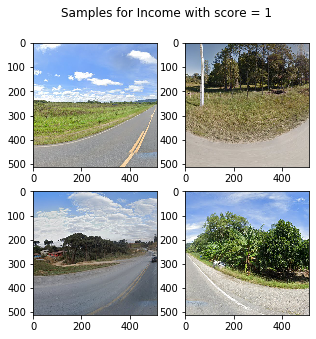

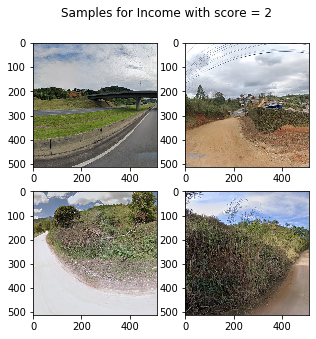

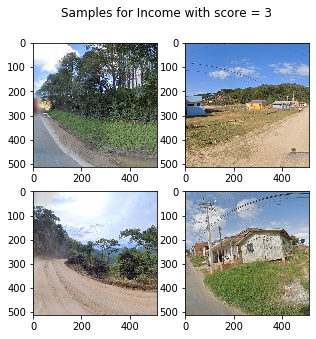

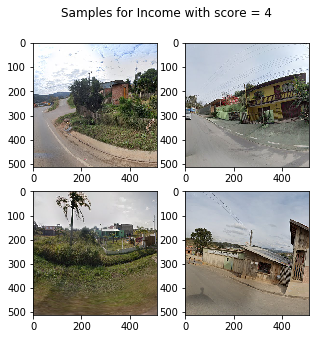

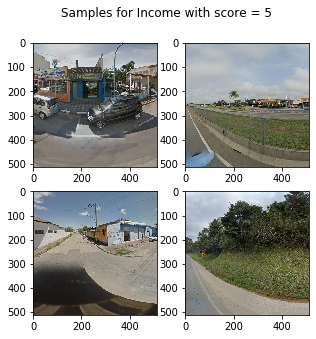

In [8]:
photo_df = pd.DataFrame(columns=['city','setor','latitude', 'longitude', 'filename','score'])
for s in range(0,len(INDICATOR)):
    df = pd.read_csv('geo_fold.csv') 
    idh = pd.read_csv('IDHMs/IDHM_ValeRibeira.csv')
    ds = pd.merge(df, idh, left_on='setor', right_on='Cod_setor', how='inner')
    
    print('----- score = 1 -------')
    photo_df = pd.concat([photo_df, plot_image(score=1, w=2,h=2)])
    print('----- score = 2 -------')
    photo_df = pd.concat([photo_df, plot_image(score=2, w=2,h=2)])
    print('----- score = 3 -------')
    photo_df = pd.concat([photo_df, plot_image(score=3, w=2,h=2)])
    print('----- score = 4 -------')
    photo_df = pd.concat([photo_df, plot_image(score=4, w=2,h=2)])
    print('----- score = 5 -------')
    photo_df = pd.concat([photo_df, plot_image(score=5, w=2,h=2)])

photo_df

In [9]:
photo_df

,city,setor,latitude,longitude,filename,score
0,IGUAPE,3.520301e+14,-24.612713,-47.535351,NNZmmX7X4KT43TjEOkaYHw-90.jpg,1
1,RIO BRANCO DO SUL,4.122206e+14,-25.169822,-49.321809,NUtkUWYdfdSa5mhaVfHpEw-90.jpg,1
2,ITARIRI,3.523305e+14,-24.295338,-47.032470,ngHPnTowKyHmoNJVk_2PBA-180.jpg,1
3,MIRACATU,3.520301e+14,-24.383832,-47.524495,xvzR481D2AjyTI9qzKeELQ-180.jpg,1
0,JUQUIÁ,3.526100e+14,-24.331702,-47.634983,qJRbJhRuJPt13_TlaYEJoQ-90.jpg,2
1,CERRO AZUL,4.128633e+14,-24.782231,-49.296409,1pnw2RPJ7jMIdrFRbOdNLA-0.jpg,2
2,RIO BRANCO DO SUL,4.122206e+14,-25.214700,-49.303014,EdsETaGjbdmrG1nNVDnK4A-180.jpg,2
3,ADRIANÓPOLIS,3.522158e+14,-24.669966,-48.903882,LAcpz9kJveFqZq46tQG-Jg-270.jpg,2
0,ITAPERUÇU,4.111258e+14,-25.217666,-49.327401,9yeH2997n7uvnAyFM2A4Aw-180.jpg,3
1,ADRIANÓPOLIS,4.100202e+14,-24.673400,-48.976279,glfa5OCjqkHJU-4iO6Asqw-0.jpg,3


## Figure 5: Distribution of socioeconomic indicators per census sectors

### Number of street images used for training

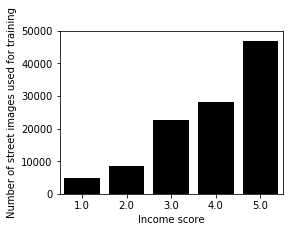

In [10]:
for s in range(0,len(INDICATOR)):
    df = pd.concat([pd.read_csv(f'{FOLDER[s]}/folds/fold-{FOLD}.csv', 
                            usecols=['filename','setor','fold',INDICATOR[s]],
                            dtype={"filename": "string", "setor": "string", "fold": "string", INDICATOR[s]:"string"})
                for FOLD in range(0,5)], ignore_index=True)  
    df['photos'] = df['filename'].notna().astype(int)        
    ds = pd.DataFrame(df.groupby(INDICATOR[s])['photos'].sum().reset_index())
    df_new = ds.rename(columns={INDICATOR[s]: INDICATOR_TITLE[s]})
    #display(df_new)
    
    plt.figure(figsize=(4,3))    
    ax= sns.barplot(x= df_new[INDICATOR_TITLE[s]], y=df_new['photos'], color = 'black')
    #plt.title(INDICATOR_TITLE[s])    
    
    ax.set(xlabel=INDICATOR_TITLE[s] + ' score', ylabel='Number of street images used for training')
    ax.set(ylim=(0, 50000))
    plt.show()

In [11]:
display(df_new)

display(df_new['photos'].sum())

,Income,photos
0,1.0,4828
1,2.0,8372
2,3.0,22688
3,4.0,28196
4,5.0,46740


110824

### Number of street images for prediction

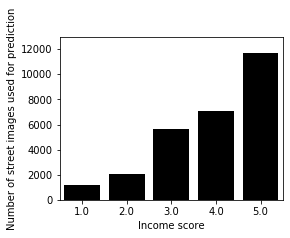

In [12]:
for s in range(0,len(INDICATOR)):
    df = pd.concat([pd.read_csv(f'{FOLDER[s]}/folds/pred-{FOLD}.csv') for FOLD in range(0,5)], ignore_index=True)  
    df['photos'] = df['setor'].notna().astype(int)        
    ds = pd.DataFrame(df.groupby(INDICATOR[s])['photos'].sum().reset_index())
    df_new = ds.rename(columns={INDICATOR[s]: INDICATOR_TITLE[s]})
    #display(df_new)
    
    plt.figure(figsize=(4,3))    
    ax= sns.barplot(x= df_new[INDICATOR_TITLE[s]], y=df_new['photos'], color = 'black')
    #plt.title(INDICATOR_TITLE[s])    
    
    ax.set(xlabel=INDICATOR_TITLE[s] + ' score', ylabel='Number of street images used for prediction')
    ax.set(ylim=(0, 13000))
    plt.show()

In [13]:
display(df_new)

display(df_new['photos'].sum())

,Income,photos
0,1.0,1207
1,2.0,2093
2,3.0,5672
3,4.0,7049
4,5.0,11685


27706

### Distribution of street images per scores

Hypothesis testing: Google images are from high scores

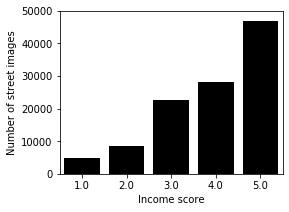

In [14]:
for s in range(0,len(INDICATOR)):
    geo = pd.read_csv('geo.csv',
                      usecols=['city','direction','filename','latitude','longitude','setor']) #this is not necessary, geo.csv is on all folders
    idh = pd.read_csv('IDHMs/IDHM_ValeRibeira.csv')

    df = pd.merge(geo, idh, left_on='setor', right_on='Cod_setor', how='left')
    df['photos'] = df['filename'].notna().astype(int)        
    ds = pd.DataFrame(df.groupby(INDICATOR[s])['photos'].sum().reset_index())
    df_new = ds.rename(columns={INDICATOR[s]: INDICATOR_TITLE[s]})
    #display(df_new)
    
    plt.figure(figsize=(4,3))    
    ax= sns.barplot(x= df_new[INDICATOR_TITLE[s]], y=df_new['photos'], color = 'black')
    #plt.title(INDICATOR_TITLE[s])    
    
    ax.set(xlabel=INDICATOR_TITLE[s] + ' score', ylabel='Number of street images')
    ax.set(ylim=(0, 50000))
    plt.show()

In [15]:
display(df_new)

display(df_new['photos'].sum())

,Income,photos
0,1.0,4828
1,2.0,8372
2,3.0,22688
3,4.0,28196
4,5.0,46740


110824

## Table 3:  Prediction performance

### Accuracy on the test set

In [16]:
for s in range(0,len(INDICATOR)):
    data = {f'fold {i}':{} for i in range(0,5)} 
    for i in range(0,5):#    
        for error in range(2): #'±0', '±1', '±2'            
            pred_fold = pd.read_csv(f'{FOLDER[s]}/folds/pred-{i}.csv')
            data[f'fold {i}'][error] = ((pred_fold[INDICATOR[s]]-pred_fold[INDICATOR_PRED[s]]).abs() <= error).astype(int).mean()
    r = pd.DataFrame(data)    
    r.index = ['±0', '±1']
    r.index.name = 'Margin'   
    print(INDICATOR_TITLE[s] + ' score')
    display(r.T)

Income score


Margin,±0,±1
fold 0,0.534239,0.778623
fold 1,0.551173,0.795131
fold 2,0.562860,0.801693
fold 3,0.565932,0.811777
fold 4,0.556490,0.814077


### Metrics on the test set

In [17]:
for s in range(0,len(INDICATOR)):            
    testing_fold = pd.read_csv(f'{FOLDER[s]}/testing/testing_metrics.csv')
    display(testing_fold)

,Fold,Loss,Accuracy,MAE,Pearson,KendallTau
0,0,2.652080,0.533960,0.214080,0.744993,0.300170
1,1,2.646951,0.551111,0.213621,0.724499,0.320210
2,2,2.354895,0.562500,0.203628,0.713360,0.324502
3,3,2.180304,0.565932,0.226223,0.671557,0.342226
4,4,2.283770,0.556469,0.224431,0.687129,0.333931


## Figure 6: Vale do Ribeira geomap prediction

In [18]:
import geopandas as gpd
import pandas as pd
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [19]:
def get_mode(x):
    # Imports
    from collections import Counter
    import random
    
    # Set Seed
    random.seed(123)
    
    data = Counter(x)
    mc_value, mc_occurrence = data.most_common(1)[0]
    most_common_list = []
    for value, occurrence in data.most_common():
        if mc_occurrence == occurrence:
            most_common_list.append(value)
    return random.choice(most_common_list)


/home/machicao/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/machicao/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


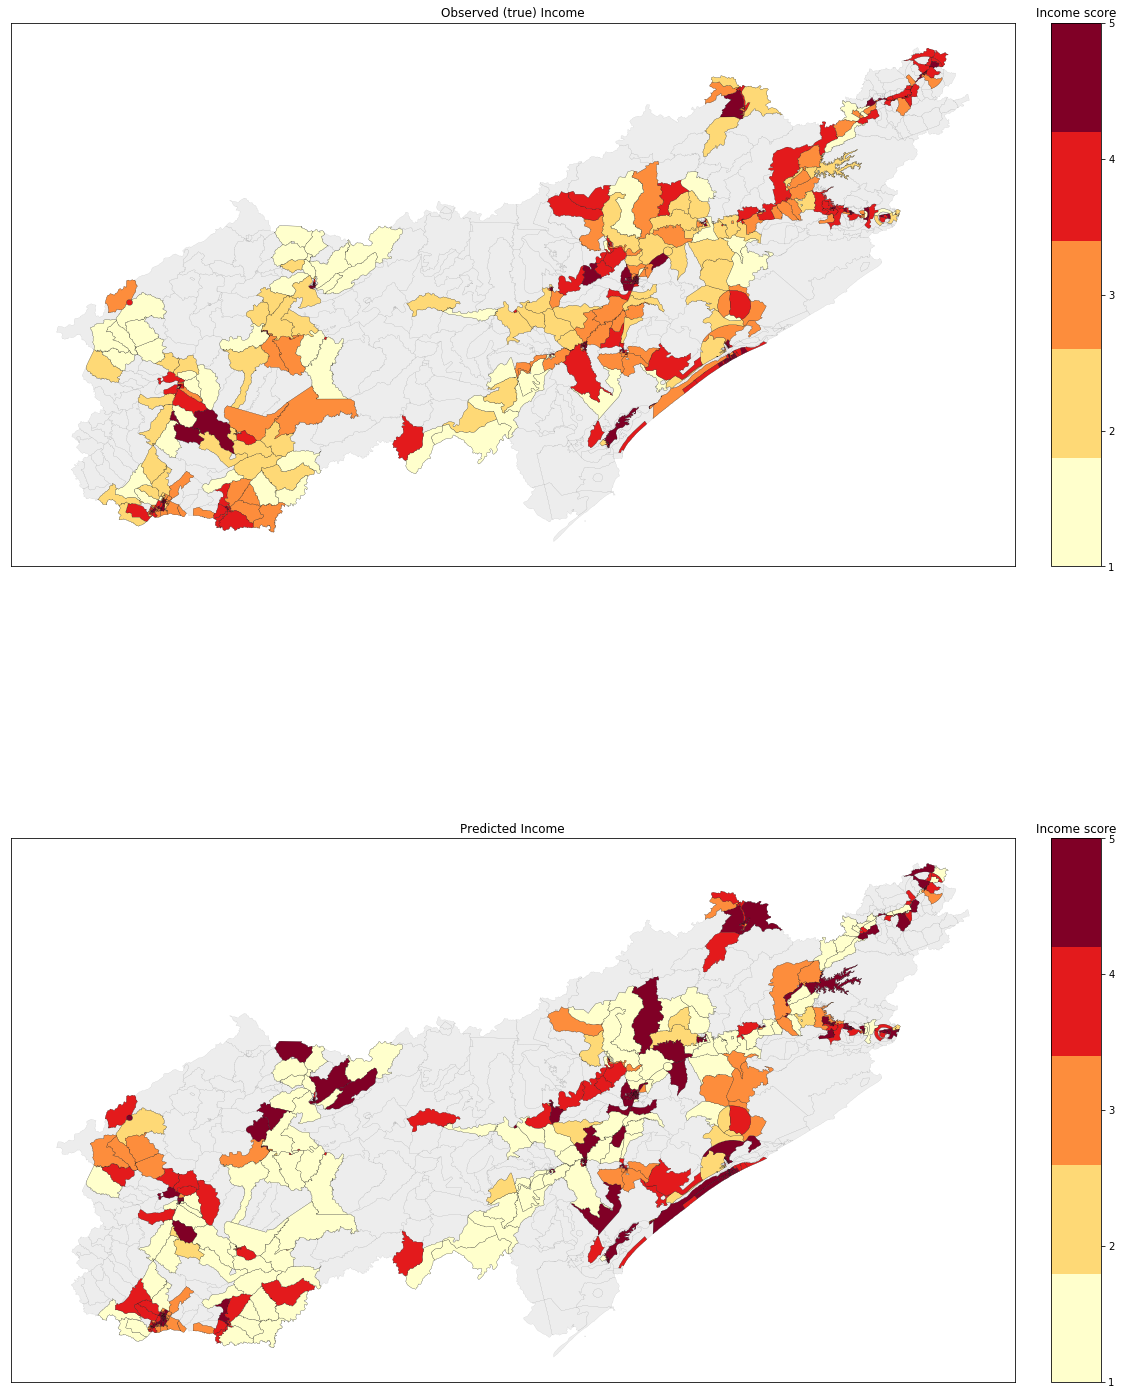

In [20]:
for s in range(0,len(INDICATOR)):
    geo = gpd.read_file('raw_data/shapefiles/vale_ribeira.dbf')
    df = pd.concat([pd.read_csv(f'{FOLDER[s]}/folds/pred-{FOLD}.csv') for FOLD in range(0,5)], ignore_index=True)
    df = pd.merge(df, geo, left_on='setor', right_on='CD_GEOCODI', how='left')

    real = df.groupby('setor', as_index=False, group_keys=False).agg(
        #{'geometry': lambda x: x.tolist()[0], INDICATOR[s]: lambda x: int(x.median())})
    #----aqui foi trocado a média pela moda ---
        {'geometry': lambda x: x.tolist()[0], INDICATOR[s]: lambda x: int(get_mode(x))})

    g_real=gpd.GeoDataFrame(real)#Convert Pandas DataFrame to GeoPandas DataFrame    

    #----aqui foi trocado a média pela moda ---
    pred = df.groupby('setor', as_index=False, group_keys=False).agg(
        {'geometry': lambda x: x.tolist()[0], INDICATOR_PRED[s]: lambda x: int(get_mode(x))})
    #{'geometry': lambda x: x.tolist()[0], INDICATOR_PRED[s]: lambda x: int(x.median())})
        
    g_pred=gpd.GeoDataFrame(pred)

    # -- configuring fancy plots params --- 
    missing_kwds={"color": "lightgrey",
                  "label": "Missing values",
                 "linewidth":0.5}
    #"edgecolor": "black",#"hatch": "...", "hatch":"///"

    cmap = plt.cm.get_cmap('YlOrRd', 5)    # 5 discrete colors

    fig, axs = plt.subplots(2, 1, figsize=(20*5,5*5))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    def plot_colorbar(axes):    
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=1, vmax=5))
        sm._A = []
        divider = make_axes_locatable(axes=axes)
        cax = divider.append_axes("right", size="5%", pad=0.5)
        cbar = fig.colorbar(sm, cax=cax,  ticks=[1,2,3,4,5])
        cbar.ax.set_title('Income score')


    #---- 1st subplot ---- 
    axs[0].set_title(f'Observed (true) {INDICATOR_TITLE[s]}')     

    # Introduce some missing values:
    #g_real.loc[np.random.choice(g_real.index, 120), INDICATOR[s]] = np.nan
    geo.plot(color= 'lightgray',alpha=0.4, edgecolor='black', ax=axs[0], linewidth=0.1) #contourn
    g_real.plot(column=INDICATOR[s], ax=axs[0], cmap=cmap,linewidth=0.2,edgecolor='black', missing_kwds=missing_kwds)#color-fill

    #axs[0].set_axis_off()
    axs[0].axes.get_xaxis().set_visible(False)
    axs[0].axes.get_yaxis().set_visible(False)
    axs[0].set_aspect('equal')
    plot_colorbar(axs[0])


    #---- 2nd subplot ----     
    axs[1].set_title(f'Predicted {INDICATOR_TITLE[s]}')#RdBu

    # Introduce some missing values:
    #g_pred.loc[np.random.choice(g_pred.index, 120), INDICATOR_PRED[s]] = np.nan

    geo.plot(color= 'lightgray',alpha=0.4, edgecolor='black', ax=axs[1], linewidth=0.1)#contourn
    g_pred.plot(column=INDICATOR_PRED[s], ax=axs[1],cmap=cmap,linewidth=0.2,edgecolor='black', missing_kwds=missing_kwds)#color-fill
    #geo.boundary.plot
    #axs[1].set_axis_off()
    axs[1].axes.get_xaxis().set_visible(False)
    axs[1].axes.get_yaxis().set_visible(False)
    axs[1].set_aspect('equal')
    plot_colorbar(axs[1])


    plt.savefig(fname='plots/map_prediction.pdf', dpi=300, facecolor='w', edgecolor='w',bbox_inches='tight')
    plt.savefig(fname='plots/map_prediction.png', dpi=400, facecolor='w', edgecolor='w',bbox_inches='tight')
    #plt.show() 


In [21]:
city_codes = {
    'PARIQUERA-AÇU': 3536208,
    'RIBEIRA': 3542800,
    'ITAÓCA': 3522158,
    'CANANÉIA': 3509908,
    'ELDORADO': 3514809,
    'IGUAPE': 3520301,
    'ILHA COMPRIDA': 3520426,
    'JACUPIRANGA': 3524600,
    'IPORANGA': 3521200,
    'JUQUIÁ': 3526100,
    'ITARIRI': 3523305,
    'JUQUITIBA': 3526209,
    'ITAPIRAPUÃ PAULISTA': 3522653,
    'MIRACATU': 3529906,
    'TAPIRAÍ': 3553500,
    'SÃO LOURENÇO DA SERRA': 3549953,
    'REGISTRO': 3542602,
    'SETE BARRAS': 3551801,
    'PEDRO DE TOLEDO': 3537206,
    'CAJATI': 3509254,
    'CERRO AZUL': 4105201,
    'ITAPERUÇU': 4111258,
    'BOCAIÚVA DO SUL': 4103107,
    'TUNAS DO PARANÁ': 4127882,
    'RIO BRANCO DO SUL': 4122206,
    'BARRA DO TURVO': 3505401,
    'APIAÍ': 3502705,
    'BARRA DO CHAPÉU': 3505351,
    'DOUTOR ULYSSES': 4128633,
    'ADRIANÓPOLIS': 4100202
}


In [22]:
from shapely.geometry import Point, Polygon
from matplotlib.patches import Patch
from statistics import mode
for s in range(0,len(INDICATOR)):
    vr = gpd.read_file('raw_data/shapefiles/censo2010_municipios_valeRibeira/valedaRibeira_merged.dbf') 
    #valedaRibeira_merged.DBF contains only boundaries of VR


    #geo
    geo = pd.read_csv('geo.csv') 
    df = geo[geo['pano_id'] != 'pano_id']
    df['latitude'] = df['latitude'].astype(float)
    df['longitude'] = df['longitude'].astype(float)
    df = df.drop_duplicates(subset=['pano_id', 'direction'])
    df = df[(df['latitude'] < 10)&(df['longitude'] > -75)&(df['longitude'] < -25)]
    geometry = [Point(xy) for xy in zip(df['longitude'].astype(float), df['latitude'].astype(float))]
    geo = gpd.GeoDataFrame(df, geometry=geometry)

    #geo2
    geo2 = gpd.read_file('raw_data/shapefiles/vale_ribeira.dbf')
    #vale_ribeira.dbf contains boundaries of each municipality

    df2 = pd.concat([pd.read_csv(f'{FOLDER[s]}/folds/pred-{FOLD}.csv') for FOLD in range(0,5)], ignore_index=True)
    df2 = pd.merge(df2, geo2, left_on='setor', right_on='CD_GEOCODI', how='left')


    real = df2.groupby('setor', as_index=False, group_keys=False).agg(
        {'geometry': lambda x: x.tolist()[0], INDICATOR[s]: lambda x: int(get_mode(x))})
    g_real=gpd.GeoDataFrame(real)#Convert Pandas DataFrame to GeoPandas DataFrame    

    pred = df2.groupby('setor', as_index=False, group_keys=False).agg(
    {'geometry': lambda x: x.tolist()[0], INDICATOR_PRED[s]: lambda x: int(get_mode(x))})
    g_pred=gpd.GeoDataFrame(pred)

    ## calculating difference error

    g_dif = pd.merge(g_real, g_pred[['setor','quintilRendaPred']], on="setor")
    g_dif['diff'] = g_dif['quintilRenda'] - g_dif['quintilRendaPred']
    g_dif['diff_abs'] = (g_dif['quintilRenda'] - g_dif['quintilRendaPred']).abs()

    #g_dif['diff'].value_counts()




## Figure 7: geomap absolute error

In [23]:
from shapely.geometry import Point, Polygon
from matplotlib.patches import Patch
from statistics import mode

for s in range(0,len(INDICATOR)):
    vr = gpd.read_file('raw_data/shapefiles/censo2010_municipios_valeRibeira/valedaRibeira_merged.dbf') 
    #valedaRibeira_merged.DBF contains only boundaries of VR


    #geo
    geo = pd.read_csv('geo.csv') 
    df = geo[geo['pano_id'] != 'pano_id']
    df['latitude'] = df['latitude'].astype(float)
    df['longitude'] = df['longitude'].astype(float)
    df = df.drop_duplicates(subset=['pano_id', 'direction'])
    df = df[(df['latitude'] < 10)&(df['longitude'] > -75)&(df['longitude'] < -25)]
    geometry = [Point(xy) for xy in zip(df['longitude'].astype(float), df['latitude'].astype(float))]
    geo = gpd.GeoDataFrame(df, geometry=geometry)

    #geo2
    geo2 = gpd.read_file('raw_data/shapefiles/vale_ribeira.dbf')
    #vale_ribeira.dbf contains boundaries of each municipality

    df2 = pd.concat([pd.read_csv(f'{FOLDER[s]}/folds/pred-{FOLD}.csv') for FOLD in range(0,5)], ignore_index=True)
    df2 = pd.merge(df2, geo2, left_on='setor', right_on='CD_GEOCODI', how='left')


    real = df2.groupby('setor', as_index=False, group_keys=False).agg(
        {'geometry': lambda x: x.tolist()[0], INDICATOR[s]: lambda x: int(get_mode(x))})
    g_real=gpd.GeoDataFrame(real)#Convert Pandas DataFrame to GeoPandas DataFrame    

    pred = df2.groupby('setor', as_index=False, group_keys=False).agg(
        {'geometry': lambda x: x.tolist()[0], INDICATOR_PRED[s]: lambda x: int(get_mode(x))})
    g_pred=gpd.GeoDataFrame(pred)

    ## calculating difference error

    g_dif = pd.merge(g_real, g_pred[['setor','quintilRendaPred']], on="setor")
    g_dif['diff'] = g_dif['quintilRenda'] - g_dif['quintilRendaPred']
    g_dif['diff_abs'] = (g_dif['quintilRenda'] - g_dif['quintilRendaPred']).abs()

    #g_dif['diff'].value_counts()



/home/machicao/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


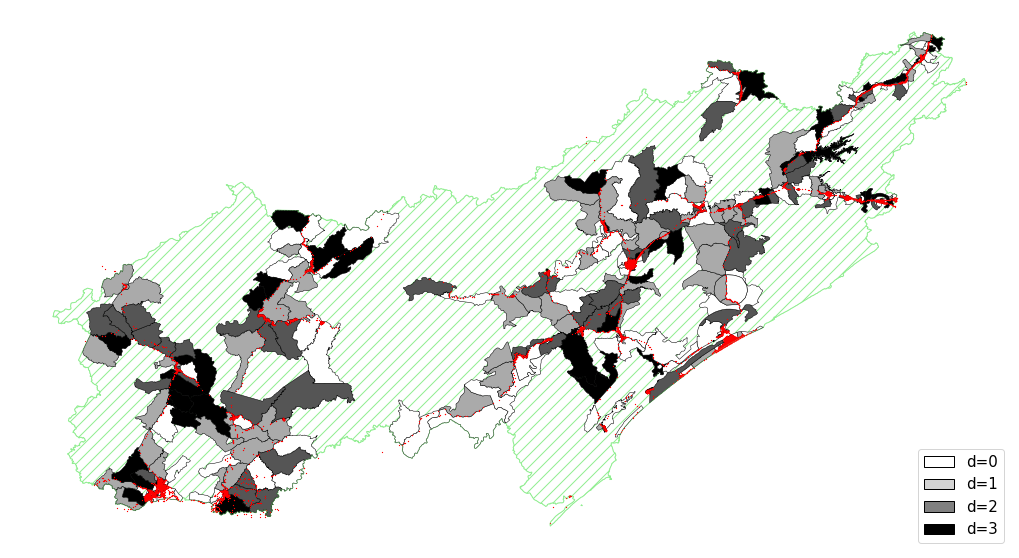

In [24]:

 
missing_kwds={"color": "lightgrey",
              "label": "Missing values",
             "linewidth":0.5}   

my_cmap = plt.cm.get_cmap('gray_r',4)

fig, axs = plt.subplots(1, 1, figsize=(10*2,5*2))
fig.subplots_adjust(hspace=0.5, wspace=0.5)



def plot_colorbar(axes, cmap_, values, init, end, text):    
    sm = plt.cm.ScalarMappable(cmap=cmap_, norm=plt.Normalize(vmin=init, vmax=end))
    sm._A = []
    divider = make_axes_locatable(axes=axes)
    cax = divider.append_axes("right", size=str(values)+"%", pad=0.5)
    cbar = fig.colorbar(sm, cax=cax,  ticks=list(range(1, values)), shrink=0.5)
    cbar.ax.set_title(text)

    
#---- 5th subplot ---- 
#axs.set_title(f'Predicted Difference Absolute with Image Indicators')

vr.boundary.plot(edgecolor='lightgreen',ax=axs, linewidth=0.3,linestyle='dashed') #contourn
vr.plot(cmap= my_cmap, edgecolor='lightgreen',ax=axs, hatch="//") #fill
g_dif.plot(column='diff_abs', ax=axs,cmap=my_cmap,linewidth=0.5,edgecolor='black', missing_kwds=missing_kwds)#color-fill


axs.legend(handles=[Patch(facecolor='white', edgecolor='black', alpha=1, label='d=0'),
                    Patch(facecolor='lightgray', edgecolor='black',label='d=1'),
                   Patch(facecolor='gray',edgecolor='black', label='d=2'),
                   Patch(facecolor='black',edgecolor='black', label='d=3')],
                    loc='lower right',
                    fontsize=15)


for city in geo['city'].unique():
    city_dots = geo[geo['city'] == city]        
    images_plot = city_dots.plot(ax=axs, markersize=0.5, color='red',linewidth=0.4) #streets

    
#plot_colorbar(axs,my_cmap,4,0,3,'Abs. error')  
#axs.axes.get_xaxis().set_visible(False)
#axs.axes.get_yaxis().set_visible(False)
axs.set_aspect('equal')
axs.axis('off')


  


plt.savefig(fname='plots/error_map_prediction.pdf', dpi=100, facecolor='w', edgecolor='w',bbox_inches='tight')
plt.savefig(fname='plots/error_map_prediction.png', dpi=600, facecolor='w', edgecolor='w',bbox_inches='tight')


## Figure 8: distribution of prediction on VR

In [25]:
geo = pd.read_csv('geo.csv',usecols=['city','direction','filename','latitude','longitude','setor']) #this is not necessary, geo.csv is on all folders
geo

,city,direction,filename,latitude,longitude,setor
0,APIAÍ,0,amYzj4DUMQbgHzB9M3a_WA-0.jpg,-24.514697,-48.846783,3.502705e+14
1,APIAÍ,90,amYzj4DUMQbgHzB9M3a_WA-90.jpg,-24.514697,-48.846783,3.502705e+14
2,APIAÍ,180,amYzj4DUMQbgHzB9M3a_WA-180.jpg,-24.514697,-48.846783,3.502705e+14
3,APIAÍ,270,amYzj4DUMQbgHzB9M3a_WA-270.jpg,-24.514697,-48.846783,3.502705e+14
4,APIAÍ,0,LoaIOwDck-H26nB1MZdD7Q-0.jpg,-24.514405,-48.846691,3.502705e+14
...,...,...,...,...,...,...
112363,DOUTOR ULYSSES,270,oSXOgE7j3mV9lfiPJMwySA-270.jpg,-24.646414,-49.425382,4.128633e+14
112364,DOUTOR ULYSSES,0,VknK6sWJIKFoVDOPr94viA-0.jpg,-24.625669,-49.418806,4.128633e+14
112365,DOUTOR ULYSSES,90,VknK6sWJIKFoVDOPr94viA-90.jpg,-24.625669,-49.418806,4.128633e+14
112366,DOUTOR ULYSSES,180,VknK6sWJIKFoVDOPr94viA-180.jpg,-24.625669,-49.418806,4.128633e+14


In [26]:
geo_img = geo.groupby(['setor']).count()

In [27]:
geo_img

,city,direction,filename,latitude,longitude
setor,,,,,
3.502705e+14,16,16,16,16,16
3.502705e+14,180,180,180,180,180
3.502705e+14,128,128,128,128,128
3.502705e+14,264,264,264,264,264
3.502705e+14,116,116,116,116,116
...,...,...,...,...,...
4.128633e+14,80,80,80,80,80
4.128633e+14,52,52,52,52,52
4.128633e+14,24,24,24,24,24


In [28]:
geo_img = geo_img.reset_index()

In [29]:
g_ins = pd.merge(g_dif, geo_img[['setor','filename']], on="setor")
g_ins['filename'] = g_ins['filename']/4 
g_ins

,setor,geometry,quintilRenda,quintilRendaPred,diff,diff_abs,filename
0,3.502705e+14,"POLYGON ((-48.84580 -24.51313, -48.84650 -24.5...",5.0,5,0.0,0.0,4.0
1,3.502705e+14,"POLYGON ((-48.84489 -24.51740, -48.84509 -24.5...",5.0,5,0.0,0.0,45.0
2,3.502705e+14,"POLYGON ((-48.85038 -24.52333, -48.85048 -24.5...",5.0,5,0.0,0.0,32.0
3,3.502705e+14,"POLYGON ((-48.84511 -24.52691, -48.85691 -24.5...",5.0,5,0.0,0.0,66.0
4,3.502705e+14,"POLYGON ((-48.84589 -24.51157, -48.84659 -24.5...",5.0,5,0.0,0.0,29.0
...,...,...,...,...,...,...,...
495,4.128633e+14,"POLYGON ((-49.31758 -24.72328, -49.31496 -24.7...",2.0,4,-2.0,2.0,20.0
496,4.128633e+14,"POLYGON ((-49.39916 -24.70718, -49.35284 -24.6...",1.0,3,-2.0,2.0,13.0
497,4.128633e+14,"POLYGON ((-49.37073 -24.61246, -49.36844 -24.6...",1.0,3,-2.0,2.0,6.0
498,4.128633e+14,"POLYGON ((-49.46065 -24.62345, -49.46026 -24.6...",1.0,3,-2.0,2.0,2.0


In [30]:
g_ins['quintilRendaInt'] = g_ins['quintilRenda'].astype(np.int)

In [31]:
g_ins['Prediction Absolute Difference'] = g_ins['diff_abs'].astype(np.int)

/home/machicao/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2784: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


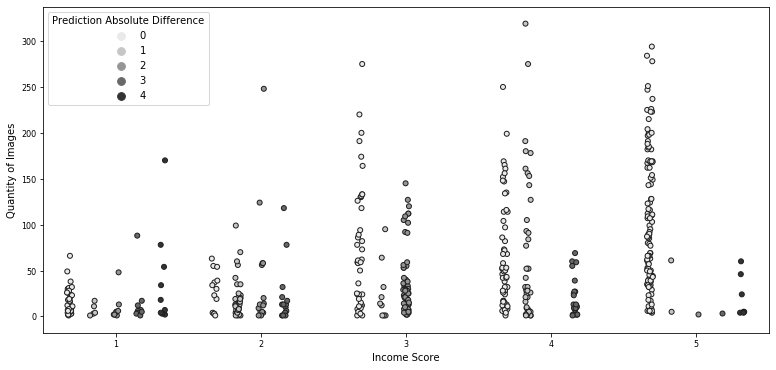

In [32]:
plt.figure(figsize=(13,6))

#ax = sns.boxplot(x="quintilRenda", y="filename", data=g_ins.sort_values(by=["quintilRenda"]) , palette="Set3")
#my_cmap = plt.cm.get_cmap('gray_r',4)

cpal = sns.color_palette('Greys',n_colors=5,desat=1.)
#cpal = sns.color_palette('Set3',n_colors=5,desat=1.)

ax = sns.stripplot(x="quintilRendaInt", y="filename",data=g_ins.sort_values(by=["quintilRenda"]),hue="Prediction Absolute Difference", palette=cpal,split=True,linewidth=1,edgecolor='gray')
ax.set_xlabel("Income Score",fontsize=10)
ax.set_ylabel("Quantity of Images",fontsize=10)
ax.tick_params(labelsize=8)
plt.savefig('plots/predictions_abs_diff.pdf', dpi=600, facecolor='w', edgecolor='w')


## Figure 9: Confussion matrix

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from IPython.display import display

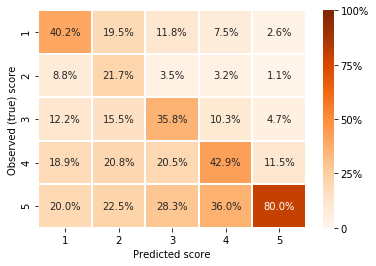

In [34]:
for s in range(0,len(INDICATOR)):
    df = pd.concat([pd.read_csv(f'{FOLDER[s]}/folds/pred-{FOLD}.csv') for FOLD in range(0,5)], ignore_index=True)
    
    #cf = confusion_matrix(df[INDICATOR[s]], df[INDICATOR_PRED[s]])
    cf = confusion_matrix(df[INDICATOR[s]], df[INDICATOR_PRED[s]], normalize='true')

    plt.figure(figsize=(6,4))
    #ax=sns.heatmap((cf.T/cf.sum(axis=1)), xticklabels=range(1,5+1),yticklabels=range(1,5+1),
    ax=sns.heatmap(cf.T, xticklabels=range(1,5+1),yticklabels=range(1,5+1),
                annot=True, 
                fmt='.1%', cmap='Oranges',
                vmin=0, vmax=1,
               linewidths=1)
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0, .25, .5, .75, 1])
    cbar.set_ticklabels(['0', '25%', '50%', '75%', '100%'])
    #plt.title("Confusion matrix "+ INDICATOR_TITLE[s])
    plt.xlabel('Predicted score')
    plt.ylabel('Observed (true) score')    
    plt.savefig(fname=f'plots/confmatrix-{INDICATOR_TITLE[s]}.pdf', dpi=300, facecolor='w', edgecolor='w')
    plt.savefig(fname=f'plots/confmatrix-{INDICATOR_TITLE[s]}.png', dpi=600, facecolor='w', edgecolor='w')


In [35]:
cf.sum(axis=1).sum(axis=0)*4

20.0